In [184]:
import pandas as pd
import datetime as dt

from transformers import pipeline
from lib import get_sentiment, get_emotion
from vis import plot_sub_per_month, plot_trending, plot_trending_selected_year, plot_sentiment, plot_emotion

In [185]:
sub_df = pd.read_csv('reddit_data.csv')
comments_df = pd.read_csv('reddit_comments_data.csv')

In [186]:
sub_df['created_date'] = sub_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
sub_df['created_year_month'] = sub_df['created_date'].dt.strftime('%Y-%m')

In [187]:
# merge comments to their respective sub, both dataframes have a 'post_id'
# how = left to keep all the rows from submission and fill in NaN values for missing comments
comments_posts_df = sub_df.merge(comments_df, on='post_id', how='left')

# remove rows with missing comments
comments_posts_df.dropna(subset=['comment'], inplace = True)

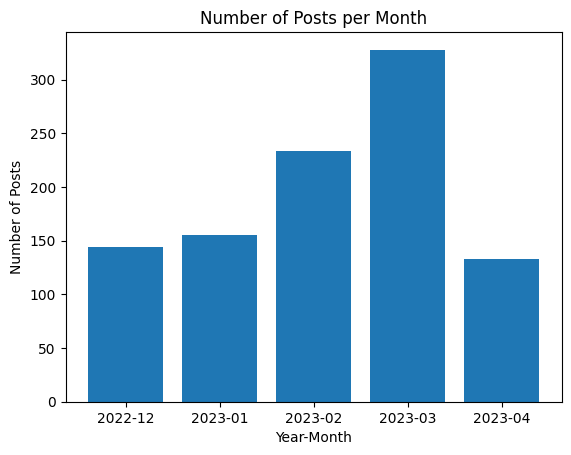

In [188]:
plot_sub_per_month(sub_df)

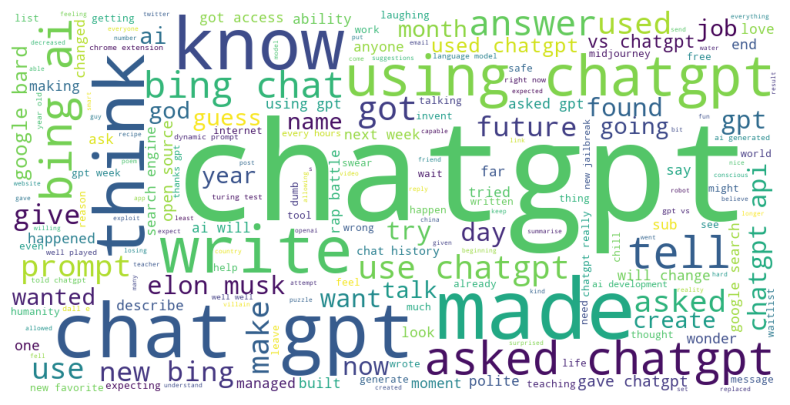

In [189]:
plot_trending(sub_df)

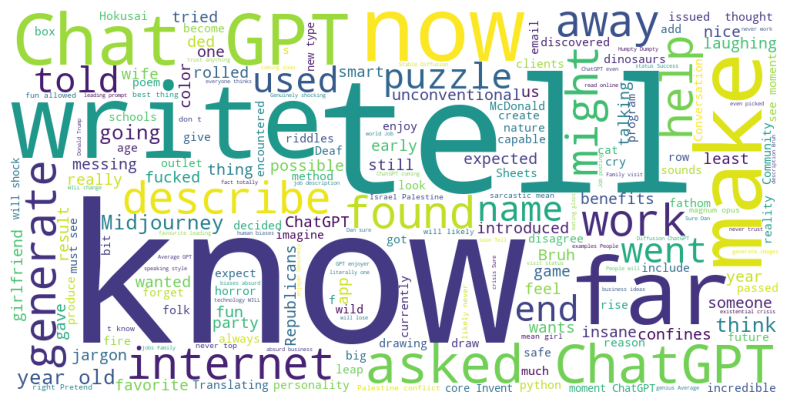

In [190]:
selected_year_month = "2022-12"
plot_trending_selected_year(selected_year_month, sub_df)

In [177]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [ ]:
comments_posts_df['sentiment'] = comments_posts_df['comment'].astype(str).apply(lambda x: get_sentiment(x, sentiment_classifier))

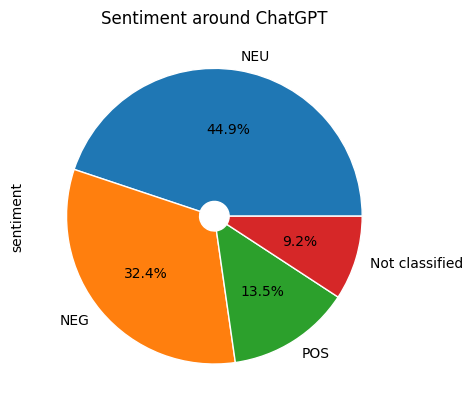

In [ ]:
plot_sentiment(comments_posts_df)

In [ ]:
emotion_classifier = pipeline("text-classification", model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores= True)

Some layers from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized: ['dropout_317']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\us

In [ ]:
comments_posts_df['emotion'] = comments_posts_df['comment'].astype(str).apply(lambda x: get_emotion(x[:100], emotion_classifier))

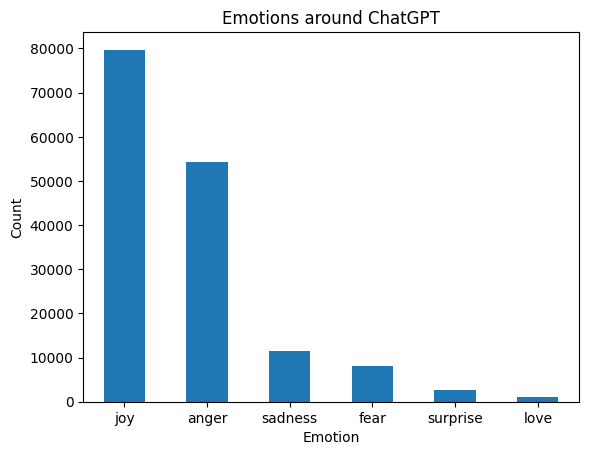

In [ ]:
plot_emotion(comments_posts_df) 